In [4]:
!pip install yellowbrick


DEPRECATION: Loading egg at c:\users\daneil\appdata\local\programs\python\python311\lib\site-packages\magicformulabr-0.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [6]:

# Carregando o dataset
data = load_breast_cancer()
X, y = data['data'], data['target']

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão logística
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Avaliando o modelo
predição_treino = model.predict(X_train)
predição_teste = model.predict(X_test)


Precisão: 0.9459459459459459
Recall: 0.9859154929577465
Acurácia (treino): 0.9582417582417583
Acurácia (teste): 0.956140350877193


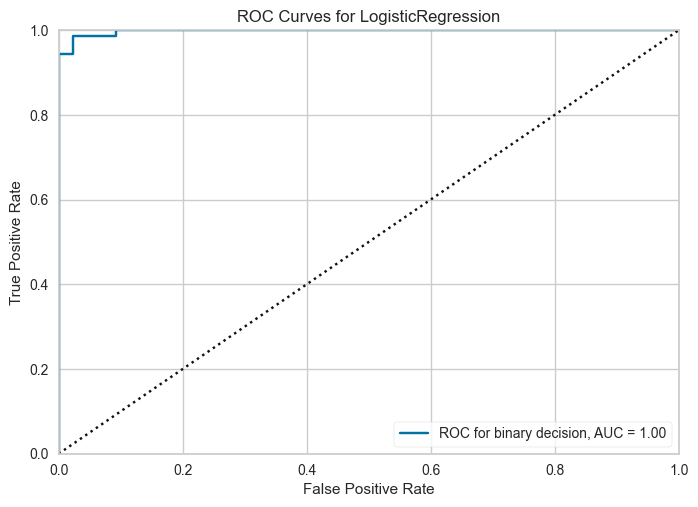

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [7]:

# Cálculo das métricas
print('Precisão:', precision_score(y_test, predição_teste))
print('Recall:', recall_score(y_test, predição_teste))
print('Acurácia (treino):', accuracy_score(y_train, predição_treino))
print('Acurácia (teste):', accuracy_score(y_test, predição_teste))

# Visualização da curva ROC usando Yellowbrick
visualizer = ROCAUC(model, classes=['malignant', 'benign'], binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


In [8]:

# Cálculo das probabilidades para as curvas ROC
prob_treino = model.predict_proba(X_train)[:, 1]
prob_teste = model.predict_proba(X_test)[:, 1]

# Cálculo do AUC
auc_treino = roc_auc_score(y_train, prob_treino)
auc_teste = roc_auc_score(y_test, prob_teste)
print('AUC (treino):', auc_treino)
print('AUC (teste):', auc_teste)


AUC (treino): 0.9939380146480739
AUC (teste): 0.9977071732721914


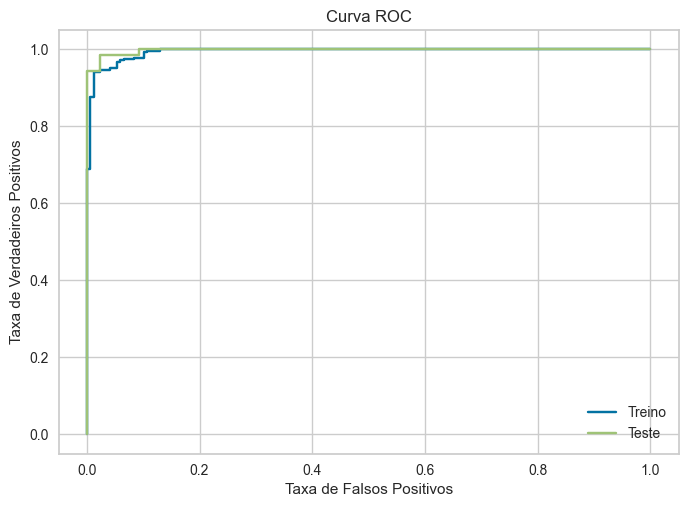

In [9]:

# Plotagem manual da curva ROC
roc_treino = roc_curve(y_train, prob_treino)
roc_teste = roc_curve(y_test, prob_teste)
plt.plot(roc_treino[0], roc_treino[1], label='Treino')
plt.plot(roc_teste[0], roc_teste[1], label='Teste')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()